In [34]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)

numpy.ndarray

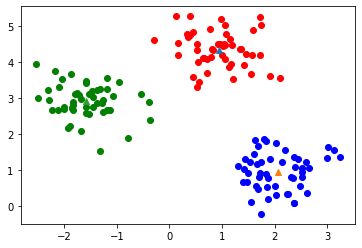

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 欧氏距离的计算
def o_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))
 
# 给出随机k个初始簇中心
def randCenter(data,k):
    m,n = data.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m))
        centroids[i,:] = data[index,:]
    return centroids

def KMeans(data,k):
    m = np.shape(data)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    clusterChange = True
    # 初始化簇中心
    centroids = randCenter(data,k)
    while clusterChange:
        clusterChange = False
        # 遍历所有的样本
        for i in range(m):
            minDist = 100000.0
            minIndex = -1
            # 遍历所有的簇中心并找出最近的簇中心
            for j in range(k):
                # 计算该样本到簇中心的欧式距离
                distance = o_distance(centroids[j,:],data[i,:])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            # 更新簇
            if clusterAssment[i,0] != minIndex:
                clusterChange = True
                clusterAssment[i,:] = minIndex,minDist**2
        # 更新簇中心
        for j in range(k):
            pointsInCluster = data[np.nonzero(clusterAssment[:,0].A == j)[0]]
            centroids[j,:] = np.mean(pointsInCluster,axis=0)
    return centroids,clusterAssment
 
def showCluster(data,k,centroids,clusterAssment):
    m,n = data.shape
    assert n == 2 , '数据不是二维的'
    
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    assert k < len(mark), '给定k值过大'

    for i in range(m):
        markIndex = int(clusterAssment[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])

    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],'^')
    plt.show()

centroids,clusterAssment = KMeans(X,3)
showCluster(X,k,centroids,clusterAssment)